# Getting and manipulating the meta data

In [1]:
import fstpy.all as fstpy
import pathlib
from datetime import datetime
import numpy as np
import pandas as pd

## Method 1 - to_pandas with explicit instance

In [2]:
std_file = fstpy.StandardFileReader('/fs/site4/eccc/cmd/w/sbf000/fstpy/source_data_5005.std')
df = std_file.to_pandas()
# remove d to display otherwise its slow
cols = list(df.columns)
cols.remove('d')
df[cols].head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,HU,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
1,HU,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
2,GZ,P,R1_V710_N,1108,1082,1,442998800,95364364,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
3,GZ,P,R1_V710_N,1108,1082,1,442998800,95357866,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
4,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
5,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
6,HR,P,R1_V710_N,1108,1082,1,442998800,94803839,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
7,HR,P,R1_V710_N,1108,1082,1,442998800,94779089,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
8,WE,P,R1_V710_N,1108,1082,1,442998800,94565237,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
9,WE,P,R1_V710_N,1108,1082,1,442998800,94553255,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761


## Method 2 - to_pandas without explicit instance

In [3]:
df = fstpy.StandardFileReader('/fs/site4/eccc/cmd/w/sbf000/fstpy/source_data_5005.std').to_pandas()
# remove d to display otherwise its slow
cols = list(df.columns)
cols.remove('d')
df[cols].head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,HU,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
1,HU,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
2,GZ,P,R1_V710_N,1108,1082,1,442998800,95364364,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
3,GZ,P,R1_V710_N,1108,1082,1,442998800,95357866,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
4,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
5,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
6,HR,P,R1_V710_N,1108,1082,1,442998800,94803839,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
7,HR,P,R1_V710_N,1108,1082,1,442998800,94779089,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
8,WE,P,R1_V710_N,1108,1082,1,442998800,94565237,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
9,WE,P,R1_V710_N,1108,1082,1,442998800,94553255,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761


# Get a dataframe from multiple standard files

In [4]:
# get files from today
dateTimeObj = datetime.now()
timestamp = dateTimeObj.strftime("%Y%m%d")# (%H:%M:%S.%f)")
timestamp = ''.join([timestamp,'00'])

RDPS_PATH = pathlib.Path('/fs/site3/eccc/ops/cmod/prod/hubs/suites/ops/rdps_20191231/r1/gridpt.usr/prog/eta')
rdps_files = [f for f in RDPS_PATH.iterdir() if f.name.startswith(timestamp)]

# split the results
files = np.array_split(np.array(rdps_files),4)

df = fstpy.StandardFileReader(list(files[0]),decode_metadata=True).to_pandas()
cols = list(df.columns)
cols.remove('d')

# See the contents of the dataframe

## Show the last rows of the dataframe

In [5]:
df[cols].tail(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
26698,J8,P,R1_V710_N,1102,1076,1,452643200,1196,60,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26699,J8,P,R1_V710_N,1102,1076,1,452643200,1197,60,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26700,J8,P,R1_V710_N,1102,1076,1,452643200,1195,60,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26701,J8,P,R1_V710_N,1102,1076,1,452643200,1198,60,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26702,J8,P,R1_V710_N,1102,1076,1,452643200,1199,60,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26703,K1,P,R1_V710_N,1102,1076,1,452643200,1195,60,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26704,K1,P,R1_V710_N,1102,1076,1,452643200,1196,60,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26705,K1,P,R1_V710_N,1102,1076,1,452643200,1197,60,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26706,K1,P,R1_V710_N,1102,1076,1,452643200,1198,60,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26707,K1,P,R1_V710_N,1102,1076,1,452643200,1199,60,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False


## Show column names of the dataframe

In [6]:
df.columns

Index(['nomvar', 'typvar', 'etiket', 'ni', 'nj', 'nk', 'dateo', 'ip1', 'ip2',
       'ip3', 'deet', 'npas', 'datyp', 'nbits', 'grtyp', 'ig1', 'ig2', 'ig3',
       'ig4', 'datev', 'grid', 'd', 'label', 'run', 'implementation',
       'ensemble_member', 'unit', 'description', 'date_of_observation',
       'date_of_validity', 'forecast_hour', 'data_type_str', 'level',
       'ip1_kind', 'ip1_pkind', 'ip2_dec', 'ip2_kind', 'ip2_pkind', 'ip3_dec',
       'ip3_kind', 'ip3_pkind', 'surface', 'follow_topography', 'ascending',
       'interval', 'vctype', 'multiple_modifications', 'zapped', 'filtered',
       'interpolated', 'unit_converted', 'bounded', 'missing_data',
       'ensemble_extra_info'],
      dtype='object')

## Show the levels contained in the dataframe

In [7]:
df.level

0        0.0000
1        0.0000
44       0.0000
45       0.0102
46       0.0233
          ...  
26703    5.0000
26704    4.0000
26705    3.0000
26706    2.0000
26707    1.0000
Name: level, Length: 26666, dtype: float32

## Show the unique levels contained in the dataframe

In [8]:
df.level.unique()

array([0.    , 0.0102, 0.0233, 0.0374, 0.0508, 0.0625, 0.072 , 0.0795,
       0.0852, 0.0897, 0.0941, 0.099 , 0.1044, 0.1104, 0.1172, 0.1248,
       0.1334, 0.1431, 0.1541, 0.1667, 0.1812, 0.1976, 0.2149, 0.2331,
       0.2522, 0.2721, 0.2928, 0.3144, 0.3369, 0.3602, 0.3843, 0.4091,
       0.4348, 0.4612, 0.4883, 0.5161, 0.5446, 0.5737, 0.6034, 0.6337,
       0.6646, 0.6959, 0.7272, 0.7567, 0.7845, 0.8104, 0.8346, 0.8571,
       0.878 , 0.8973, 0.9151, 0.9316, 0.9467, 0.9606, 0.967 , 0.9733,
       0.9792, 0.985 , 0.99  , 0.995 , 0.9975, 1.    , 5.    , 4.    ,
       3.    , 2.    ], dtype=float32)

## Show a subset of columns of the dataframe

In [9]:
df[['nomvar','typvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']]

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3
0,>>,X,R1_V710_N,1102,1,1,408244400,86086,77806,1
1,^^,X,R1_V710_N,1,1076,1,408244400,86086,77806,1
44,TT,P,R1_V710_N,1102,1076,1,452643200,2000,58,0
45,TT,P,R1_V710_N,1102,1076,1,452643200,2102,58,0
46,TT,P,R1_V710_N,1102,1076,1,452643200,2233,58,0
...,...,...,...,...,...,...,...,...,...,...
26703,K1,P,R1_V710_N,1102,1076,1,452643200,1195,60,0
26704,K1,P,R1_V710_N,1102,1076,1,452643200,1196,60,0
26705,K1,P,R1_V710_N,1102,1076,1,452643200,1197,60,0
26706,K1,P,R1_V710_N,1102,1076,1,452643200,1198,60,0


## Show a voir like output of the dataframe

In [10]:
fstpy.voir(df.head(10))


  nomvar typvar     etiket    ni    nj  nk               dateo    ip1    ip2  ip3  deet  npas datyp  nbits grtyp    ig1    ig2    ig3    ig4
0     >>      X  R1_V710_N  1102     1   1 2016-02-17 12:00:00  86086  77806    1     0     0     E     32     E   1470    560  54400  46560
1     TT      P  R1_V710_N  1102  1076   1 2021-10-04 00:00:00   2795     58    0   300   696     f     16     Z  86086  77806      1      0
2     TT      P  R1_V710_N  1102  1076   1 2021-10-04 00:00:00   2720     58    0   300   696     f     16     Z  86086  77806      1      0
3     TT      P  R1_V710_N  1102  1076   1 2021-10-04 00:00:00   2625     58    0   300   696     f     16     Z  86086  77806      1      0
4     TT      P  R1_V710_N  1102  1076   1 2021-10-04 00:00:00   2508     58    0   300   696     f     16     Z  86086  77806      1      0
5     TT      P  R1_V710_N  1102  1076   1 2021-10-04 00:00:00   2374     58    0   300   696     f     16     Z  86086  77806      1      0
6     TT    

# Select sub-sets of data

## Select TT with query method

In [11]:
sel_tt_df = df.query('nomvar=="TT"')
sel_tt_df.head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
44,TT,P,R1_V710_N,1102,1076,1,452643200,2000,58,0,...,None,ETA,False,False,False,False,False,False,False,False
45,TT,P,R1_V710_N,1102,1076,1,452643200,2102,58,0,...,None,ETA,False,False,False,False,False,False,False,False
46,TT,P,R1_V710_N,1102,1076,1,452643200,2233,58,0,...,None,ETA,False,False,False,False,False,False,False,False
47,TT,P,R1_V710_N,1102,1076,1,452643200,2374,58,0,...,None,ETA,False,False,False,False,False,False,False,False
48,TT,P,R1_V710_N,1102,1076,1,452643200,2508,58,0,...,None,ETA,False,False,False,False,False,False,False,False
49,TT,P,R1_V710_N,1102,1076,1,452643200,2625,58,0,...,None,ETA,False,False,False,False,False,False,False,False
50,TT,P,R1_V710_N,1102,1076,1,452643200,2720,58,0,...,None,ETA,False,False,False,False,False,False,False,False
51,TT,P,R1_V710_N,1102,1076,1,452643200,2795,58,0,...,None,ETA,False,False,False,False,False,False,False,False
52,TT,P,R1_V710_N,1102,1076,1,452643200,2852,58,0,...,None,ETA,False,False,False,False,False,False,False,False
53,TT,P,R1_V710_N,1102,1076,1,452643200,2897,58,0,...,None,ETA,False,False,False,False,False,False,False,False


## Select TT with loc method - more efficient

In [12]:
sel_tt_df = df.loc[df.nomvar=="TT"]
sel_tt_df.head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
44,TT,P,R1_V710_N,1102,1076,1,452643200,2000,58,0,...,None,ETA,False,False,False,False,False,False,False,False
45,TT,P,R1_V710_N,1102,1076,1,452643200,2102,58,0,...,None,ETA,False,False,False,False,False,False,False,False
46,TT,P,R1_V710_N,1102,1076,1,452643200,2233,58,0,...,None,ETA,False,False,False,False,False,False,False,False
47,TT,P,R1_V710_N,1102,1076,1,452643200,2374,58,0,...,None,ETA,False,False,False,False,False,False,False,False
48,TT,P,R1_V710_N,1102,1076,1,452643200,2508,58,0,...,None,ETA,False,False,False,False,False,False,False,False
49,TT,P,R1_V710_N,1102,1076,1,452643200,2625,58,0,...,None,ETA,False,False,False,False,False,False,False,False
50,TT,P,R1_V710_N,1102,1076,1,452643200,2720,58,0,...,None,ETA,False,False,False,False,False,False,False,False
51,TT,P,R1_V710_N,1102,1076,1,452643200,2795,58,0,...,None,ETA,False,False,False,False,False,False,False,False
52,TT,P,R1_V710_N,1102,1076,1,452643200,2852,58,0,...,None,ETA,False,False,False,False,False,False,False,False
53,TT,P,R1_V710_N,1102,1076,1,452643200,2897,58,0,...,None,ETA,False,False,False,False,False,False,False,False


## Select multiple fields

In [13]:
sel_uuvv_df = df.loc[df.nomvar.isin(["UU","VV"])]
sel_uuvv_df.head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
354,UU,P,R1_V710_N,1102,1076,1,452643200,2000,58,0,...,None,ETA,False,False,False,False,False,False,False,False
355,UU,P,R1_V710_N,1102,1076,1,452643200,2102,58,0,...,None,ETA,False,False,False,False,False,False,False,False
356,UU,P,R1_V710_N,1102,1076,1,452643200,2233,58,0,...,None,ETA,False,False,False,False,False,False,False,False
357,UU,P,R1_V710_N,1102,1076,1,452643200,2374,58,0,...,None,ETA,False,False,False,False,False,False,False,False
358,UU,P,R1_V710_N,1102,1076,1,452643200,2508,58,0,...,None,ETA,False,False,False,False,False,False,False,False
359,UU,P,R1_V710_N,1102,1076,1,452643200,2625,58,0,...,None,ETA,False,False,False,False,False,False,False,False
360,UU,P,R1_V710_N,1102,1076,1,452643200,2720,58,0,...,None,ETA,False,False,False,False,False,False,False,False
361,UU,P,R1_V710_N,1102,1076,1,452643200,2795,58,0,...,None,ETA,False,False,False,False,False,False,False,False
362,UU,P,R1_V710_N,1102,1076,1,452643200,2852,58,0,...,None,ETA,False,False,False,False,False,False,False,False
363,UU,P,R1_V710_N,1102,1076,1,452643200,2897,58,0,...,None,ETA,False,False,False,False,False,False,False,False


## Select multiple fields with more than one condition

In [14]:
sel_uuvv6_df = df.loc[(df.nomvar.isin(["UU","VV"])) & (df.ip2==6)]
sel_uuvv6_df.tail(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
2578,VV,P,R1_V710_N,1102,1076,1,452643200,11467,6,0,...,None,ETA,False,False,False,False,False,False,False,False
2579,VV,P,R1_V710_N,1102,1076,1,452643200,11606,6,0,...,None,ETA,False,False,False,False,False,False,False,False
2580,VV,P,R1_V710_N,1102,1076,1,452643200,11670,6,0,...,None,ETA,False,False,False,False,False,False,False,False
2581,VV,P,R1_V710_N,1102,1076,1,452643200,11733,6,0,...,None,ETA,False,False,False,False,False,False,False,False
2582,VV,P,R1_V710_N,1102,1076,1,452643200,11792,6,0,...,None,ETA,False,False,False,False,False,False,False,False
2583,VV,P,R1_V710_N,1102,1076,1,452643200,11850,6,0,...,None,ETA,False,False,False,False,False,False,False,False
2584,VV,P,R1_V710_N,1102,1076,1,452643200,11900,6,0,...,None,ETA,False,False,False,False,False,False,False,False
2585,VV,P,R1_V710_N,1102,1076,1,452643200,11950,6,0,...,None,ETA,False,False,False,False,False,False,False,False
2586,VV,P,R1_V710_N,1102,1076,1,452643200,11975,6,0,...,None,ETA,False,False,False,False,False,False,False,False
2587,VV,P,R1_V710_N,1102,1076,1,452643200,12000,6,0,...,None,ETA,False,False,False,False,False,False,False,False


## Selecting by date range

In [15]:
# define a start and end date
start_date = datetime(dateTimeObj.year,dateTimeObj.month,dateTimeObj.day)
end_date = datetime(dateTimeObj.year,dateTimeObj.month,dateTimeObj.day+1,23)

df.loc[df.date_of_validity.between(start_date, end_date, inclusive=True)]

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
2154,TT,P,R1_V710_N,1102,1076,1,452643200,2000,6,0,...,None,ETA,False,False,False,False,False,False,False,False
2155,TT,P,R1_V710_N,1102,1076,1,452643200,2102,6,0,...,None,ETA,False,False,False,False,False,False,False,False
2156,TT,P,R1_V710_N,1102,1076,1,452643200,2233,6,0,...,None,ETA,False,False,False,False,False,False,False,False
2157,TT,P,R1_V710_N,1102,1076,1,452643200,2374,6,0,...,None,ETA,False,False,False,False,False,False,False,False
2158,TT,P,R1_V710_N,1102,1076,1,452643200,2508,6,0,...,None,ETA,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26644,K1,P,R1_V710_N,1102,1076,1,452643200,1195,39,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26645,K1,P,R1_V710_N,1102,1076,1,452643200,1196,39,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26646,K1,P,R1_V710_N,1102,1076,1,452643200,1197,39,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26647,K1,P,R1_V710_N,1102,1076,1,452643200,1198,39,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False


# Modify meta data

## Change nomvar from TT to TTI

In [16]:
df.loc[df.nomvar=='TT','nomvar'] = 'TTI'
print(df.loc[df.nomvar=='TTI'])
# rename again
df.loc[df.nomvar=='TTI','nomvar'] = 'TT'

      nomvar typvar     etiket    ni    nj  nk      dateo    ip1  ip2  ip3  \
44       TTI      P  R1_V710_N  1102  1076   1  452643200   2000   58    0   
45       TTI      P  R1_V710_N  1102  1076   1  452643200   2102   58    0   
46       TTI      P  R1_V710_N  1102  1076   1  452643200   2233   58    0   
47       TTI      P  R1_V710_N  1102  1076   1  452643200   2374   58    0   
48       TTI      P  R1_V710_N  1102  1076   1  452643200   2508   58    0   
...      ...    ...        ...   ...   ...  ..        ...    ...  ...  ...   
22256    TTI      P  R1_V710_N  1102  1076   1  452643200  11850   60    0   
22257    TTI      P  R1_V710_N  1102  1076   1  452643200  11900   60    0   
22258    TTI      P  R1_V710_N  1102  1076   1  452643200  11950   60    0   
22259    TTI      P  R1_V710_N  1102  1076   1  452643200  11975   60    0   
22260    TTI      P  R1_V710_N  1102  1076   1  452643200  12000   60    0   

       ...  interval  vctype  multiple_modifications  zapped fi

# Reformatting meta data for other types or structures

## Changind the column names

In [17]:
translation = {'nomvar':'fieldName','etiket':'pdsLabel','dateo':'dateOfObservation'}
new_df = df.rename(columns=translation)
cols = list(new_df.columns)
cols.remove('d')
new_df[cols]

,fieldName,typvar,pdsLabel,ni,nj,nk,dateOfObservation,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
0,>>,X,R1_V710_N,1102,1,1,408244400,86086,77806,1,...,None,UNKNOWN,False,False,False,False,False,False,False,False
1,^^,X,R1_V710_N,1,1076,1,408244400,86086,77806,1,...,None,UNKNOWN,False,False,False,False,False,False,False,False
44,TT,P,R1_V710_N,1102,1076,1,452643200,2000,58,0,...,None,ETA,False,False,False,False,False,False,False,False
45,TT,P,R1_V710_N,1102,1076,1,452643200,2102,58,0,...,None,ETA,False,False,False,False,False,False,False,False
46,TT,P,R1_V710_N,1102,1076,1,452643200,2233,58,0,...,None,ETA,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,K1,P,R1_V710_N,1102,1076,1,452643200,1195,60,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26704,K1,P,R1_V710_N,1102,1076,1,452643200,1196,60,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26705,K1,P,R1_V710_N,1102,1076,1,452643200,1197,60,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26706,K1,P,R1_V710_N,1102,1076,1,452643200,1198,60,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False


# Working with data

## Getting the associated data for each record in the dataframe

In [18]:
uu_df = df.loc[(df.nomvar=="UU") & (df.surface==True)]
vv_df = df.loc[(df.nomvar=="VV") & (df.surface==True)]

uu_data_df = fstpy.compute(uu_df)

cols = ['nomvar','ni','nj','nk','dateo','ip1','ip2','ip3','d']

print(uu_data_df[cols])


      nomvar    ni    nj  nk      dateo    ip1  ip2  ip3  \
415       UU  1102  1076   1  452643200  12000   58    0   
1470      UU  1102  1076   1  452643200  12000   52    0   
2525      UU  1102  1076   1  452643200  12000    6    0   
3580      UU  1102  1076   1  452643200  12000   22    0   
4635      UU  1102  1076   1  452643200  12000   70    0   
5690      UU  1102  1076   1  452643200  12000   55    0   
6745      UU  1102  1076   1  452643200  12000   29    0   
7800      UU  1102  1076   1  452643200  12000   41    0   
8855      UU  1102  1076   1  452643200  12000   49    0   
9910      UU  1102  1076   1  452643200  12000   63    0   
10965     UU  1102  1076   1  452643200  12000   10    0   
12020     UU  1102  1076   1  452643200  12000    1    0   
13075     UU  1102  1076   1  452643200  12000   62    0   
14130     UU  1102  1076   1  452643200  12000   11    0   
15185     UU  1102  1076   1  452643200  12000    7    0   
16240     UU  1102  1076   1  452643200 

# Performing simple calculations

## Wind Modulus

### Create a record to hold the result

In [19]:
uv_df = vv_df.copy(deep=True)

### Get a fresh index starting from 0 and change the nomvar accordingly

In [20]:
uv_df = uv_df.reset_index(drop=True)
uv_df.loc[:,'nomvar']='UV'

### Get the first rows for uu and vv

In [21]:
uu = (uu_df.iloc[0]['d'])
vv = (vv_df.iloc[0]['d'])

### The algorithm, after this uv_df contains our result for the wind modulus in knots

In [22]:
uv = (uu**2 + vv**2)**.5
# store the result in the dataframe
uv_df.at[0,'d'] = uv
print('UU\n',uu.compute())
print('VV\n',vv.compute())

UU
 [[ -7.3170166   -6.602173    -6.3443604  ... -14.621704   -14.606079
  -14.551392  ]
 [ -7.6607666   -7.0787354   -6.7720947  ... -14.639282   -14.615845
  -14.557251  ]
 [ -7.8775635   -7.4400635   -7.166626   ... -14.703735   -14.664673
  -14.60022   ]
 ...
 [ -0.78967285  -0.901001    -1.1959229  ... -10.404907   -10.527954
  -10.533813  ]
 [ -0.7252197   -0.85217285  -1.0045166  ... -10.234985   -10.301392
  -10.729126  ]
 [ -0.65686035  -0.8033447   -0.8814697  ...  -9.973267   -10.731079
  -10.973267  ]]
VV
 [[11.873646   10.893177   10.154896   ... -4.016979   -3.7279167
  -3.3783073 ]
 [11.512318   10.797474   10.36388    ... -4.095104   -3.794323
  -3.4290886 ]
 [11.440052   10.945911   10.74474    ... -4.151745   -3.8451042
  -3.468151  ]
 ...
 [-0.42518234 -0.61268234 -1.0579948  ... -1.0872917  -1.1107292
  -1.1595573 ]
 [-0.49744797 -0.6400261  -0.9310417  ... -1.0013542  -1.0326042
  -1.1751823 ]
 [-0.5482292  -0.6322136  -0.83143234 ... -0.90369797 -1.0169792
  -1.18

### Visualize dask operations

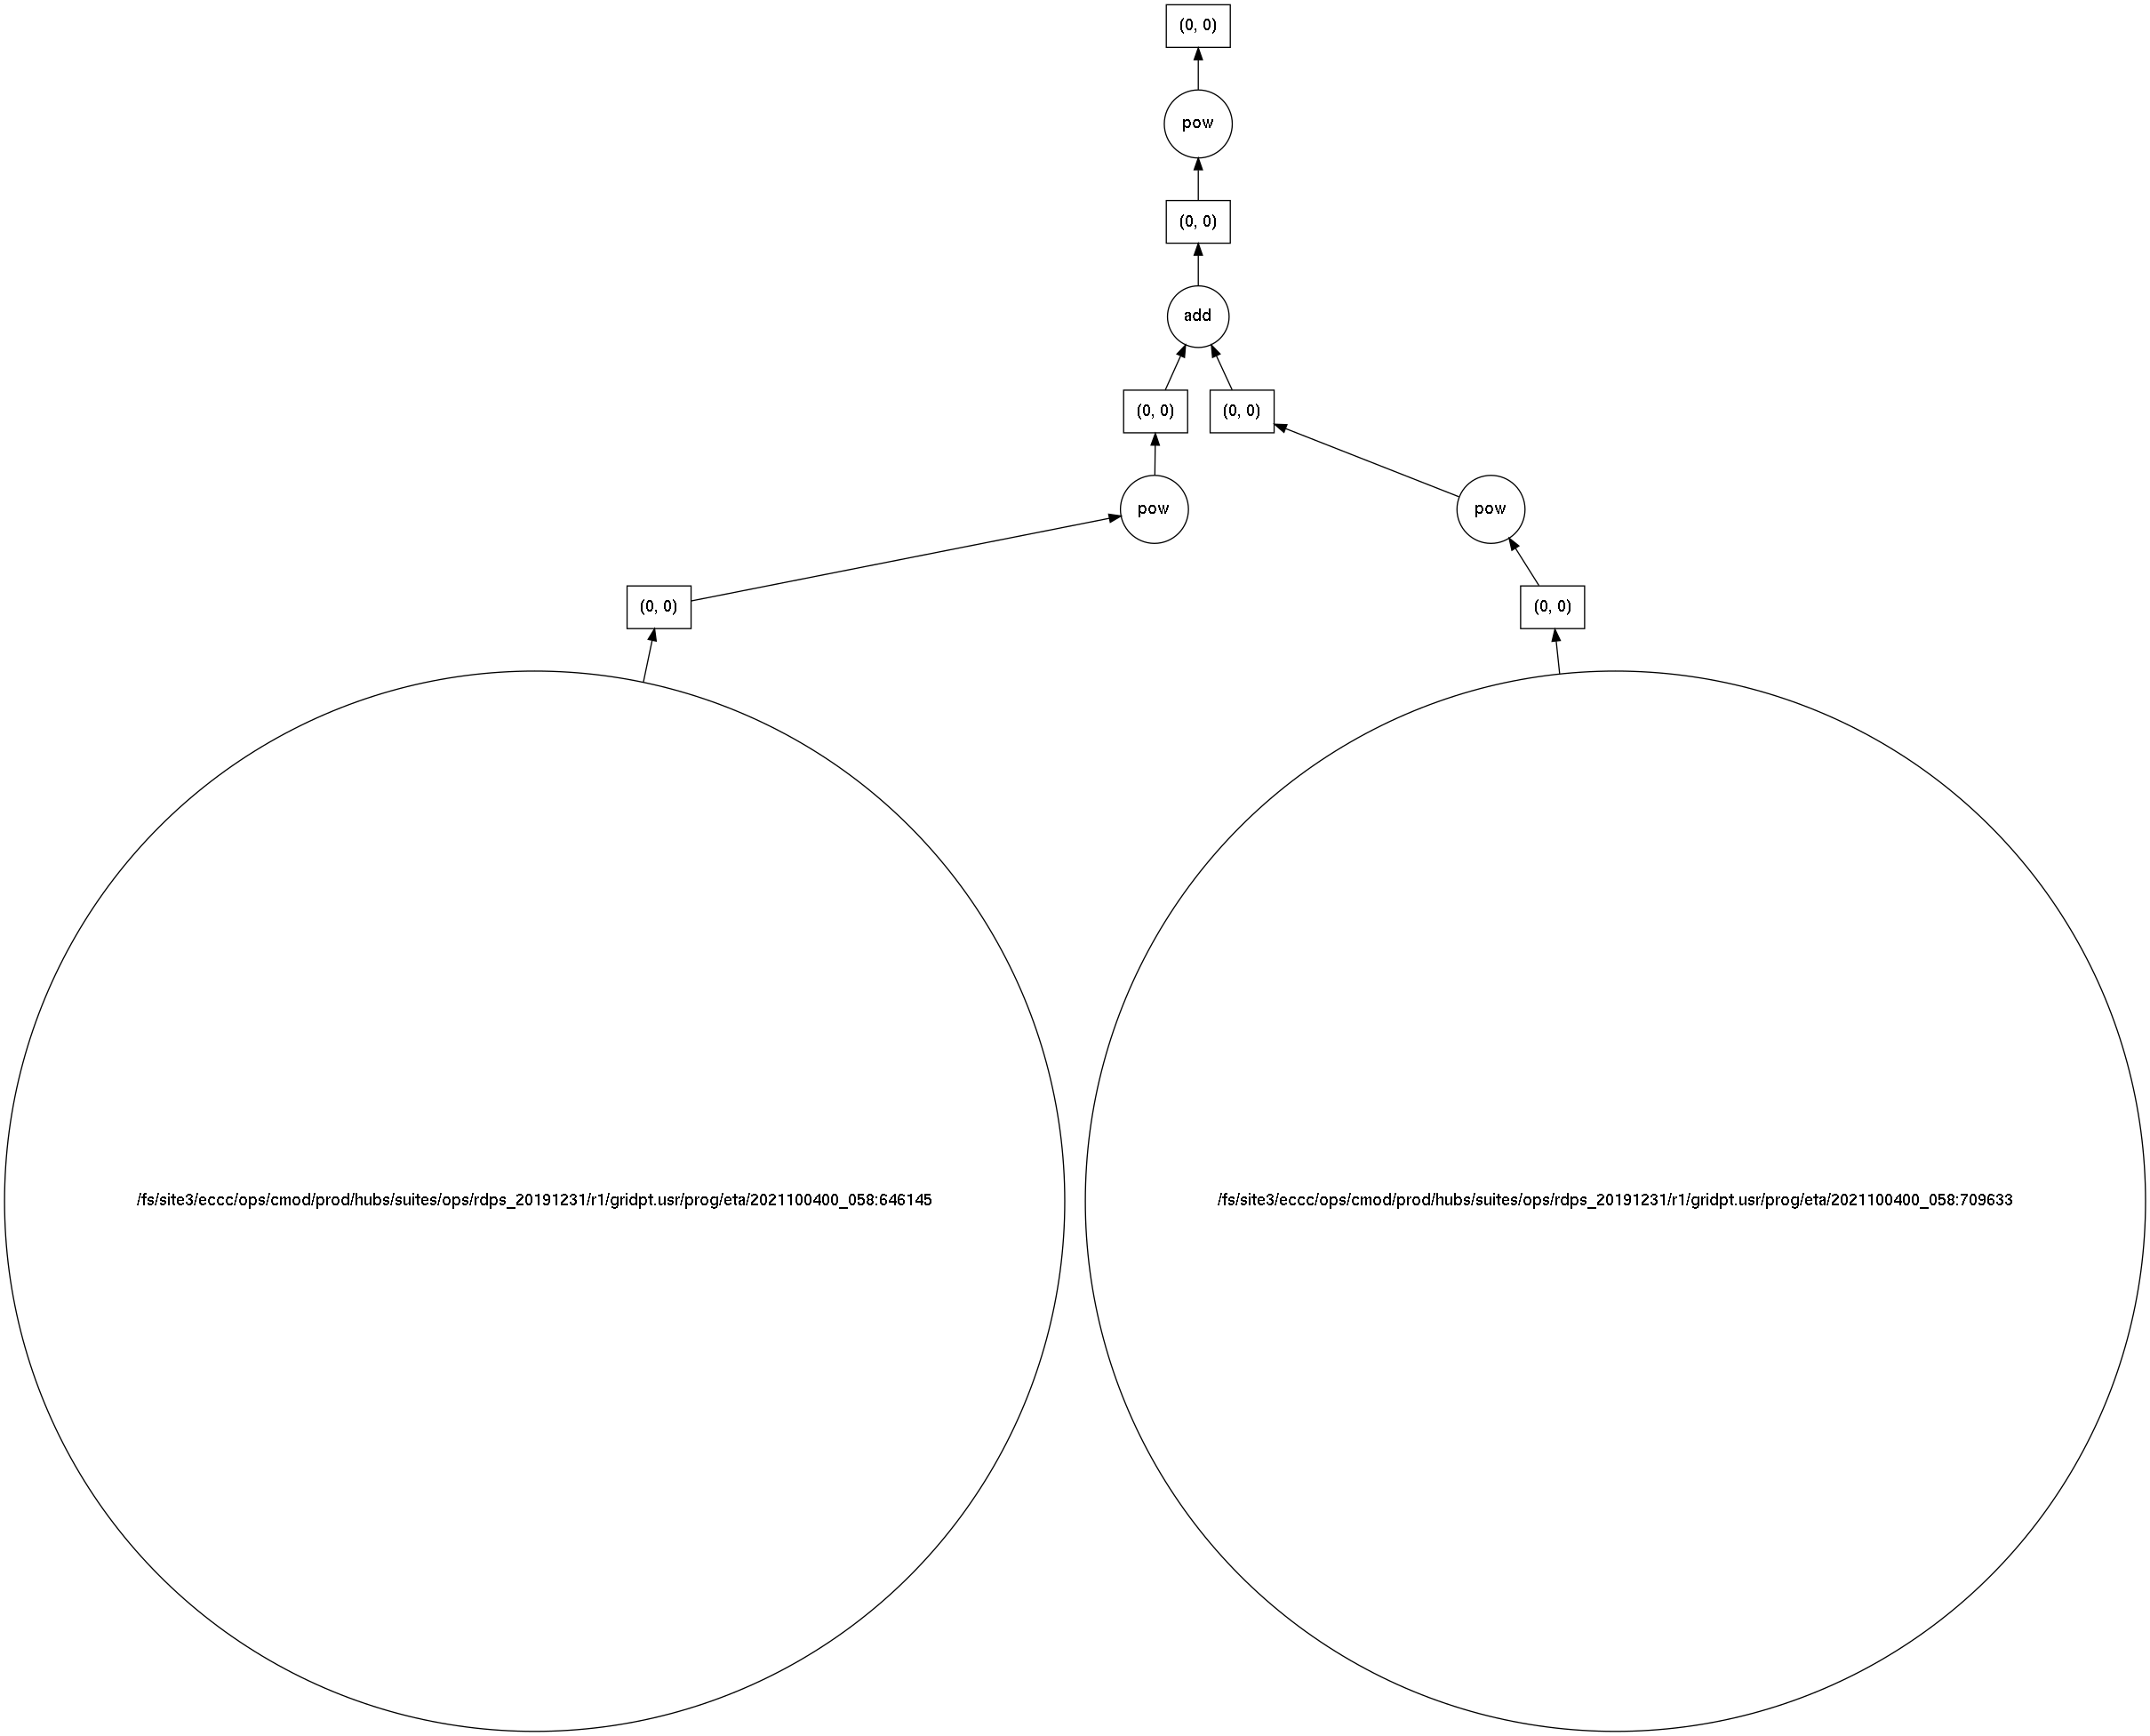

In [23]:
uv_df.iloc[0]['d'].visualize()

In [24]:
print('UV\n',uv_df.iloc[0]['d'].compute())

UV
 [[13.947121   12.73774    11.973839   ... 15.163455   15.074313
  14.938406  ]
 [13.828261   12.911      12.380278   ... 15.201265   15.100325
  14.955675  ]
 [13.889953   13.235086   12.915493   ... 15.278639   15.160391
  15.006481  ]
 ...
 [ 0.896863    1.089579    1.5967418  ... 10.461563   10.586385
  10.597444  ]
 [ 0.87943053  1.0657542   1.3696321  ... 10.283854   10.353016
  10.793294  ]
 [ 0.8555821   1.0222802   1.2117213  ... 10.014126   10.7791605
  11.03706   ]]


In [25]:
# internal structure of the dask array
uv_df.iloc[0]['d']

dask.array<pow, shape=(1102, 1076), dtype=float32, chunksize=(1102, 1076), chunktype=numpy.ndarray>

## Wind Chill

In [26]:
tt_df = df.loc[(df.nomvar=="TT") & (df.surface==True)]

### Create a record to hold wind chill reseult and change the nomvar

In [27]:
re_df = uv_df.copy(deep=True)
re_df['nomvar']='RE'

### The algorithm, after this re_df contains our result for the wind chill

In [28]:
tt = (tt_df.iloc[0]['d'])
uv = (uv_df.iloc[0]['d'])

In [29]:
# if (tt <= 0) & (uv >= 5) then
#    re = 13.12 + 0.6215 * tt + ( 0.3965 * tt - 11.37) * ( uv**0.16 )
# else
#    re = tt
re_df.at[0,'d'] = np.where( (tt <= 0) & (uv >= 5), 13.12 + 0.6215 * tt + ( 0.3965 * tt - 11.37) * ( uv**0.16 ), tt)
print('TT\n',tt.compute())

TT
 [[23.631355 23.629402 23.713387 ... 16.857918 16.801277 16.732918]
 [23.668465 23.635262 23.68409  ... 16.799324 16.738777 16.670418]
 [23.822762 23.707527 23.723152 ... 16.752449 16.68409  16.61573 ]
 ...
 [22.510262 22.908699 23.670418 ...  9.838387  9.754402  9.660652]
 [22.385262 22.775887 23.27784  ...  9.676277  9.641121  9.627449]
 [22.33448  22.604012 23.02198  ...  9.555183  9.670418  9.605965]]


### Visualize dask operations

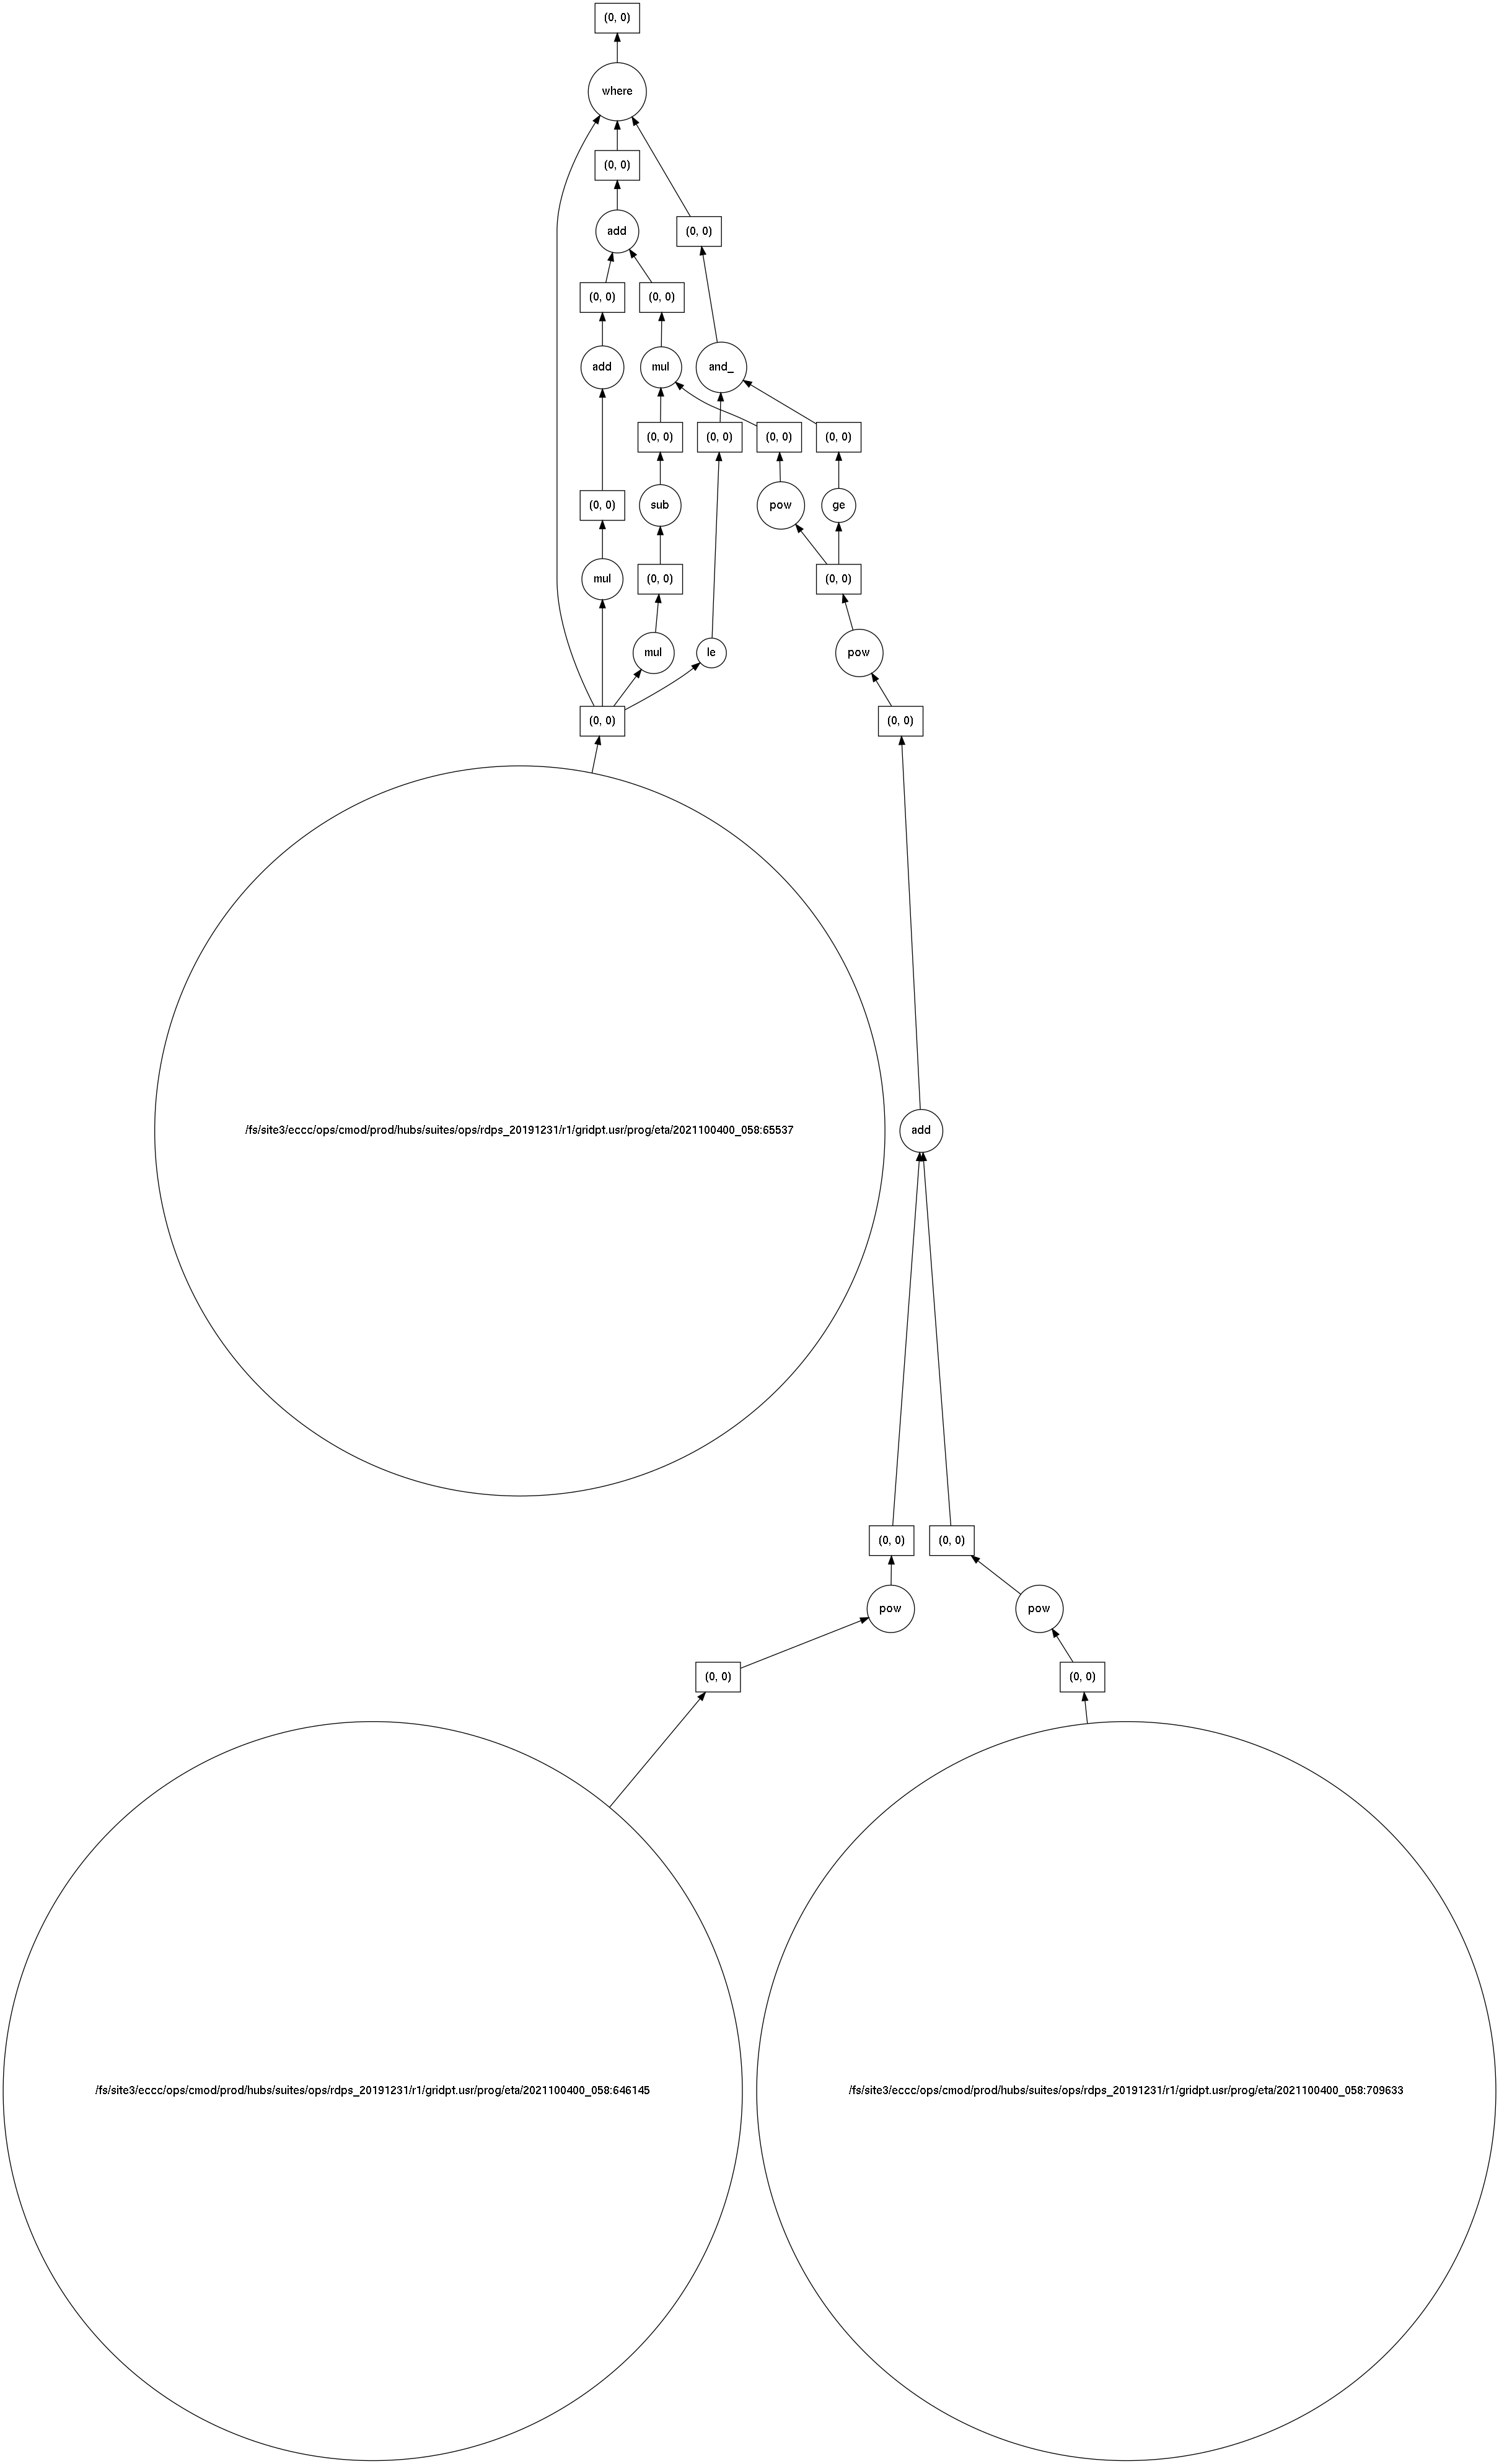

In [30]:
re_df.iloc[0]['d'].visualize()

In [31]:
print('RE\n',re_df.iloc[0]['d'].compute())

RE
 [[23.631355 23.629402 23.713387 ... 16.857918 16.801277 16.732918]
 [23.668465 23.635262 23.68409  ... 16.799324 16.738777 16.670418]
 [23.822762 23.707527 23.723152 ... 16.752449 16.68409  16.61573 ]
 ...
 [22.510262 22.908699 23.670418 ...  9.838387  9.754402  9.660652]
 [22.385262 22.775887 23.27784  ...  9.676277  9.641121  9.627449]
 [22.33448  22.604012 23.02198  ...  9.555183  9.670418  9.605965]]


## Basic statistics for TT records

### Create a function to compute statistics

In [32]:
def compute_basic_stats(df:pd.DataFrame) -> pd.DataFrame:
    """ compute for each row in a datarfame, min, max, mean, standard_deviation and the 2d indice of min and max

    :param df: input dataframe
    :type df: pd.DataFrame
    :return: output dataframe with extra columns
    :rtype: pd.DataFrame
    """
    df = fstpy.compute(df)
    df['min']=None
    df['max']=None
    df['mean']=None
    df['std']=None
    df['min_pos']=None
    df['max_pos']=None
    for i in df.index:
        df.at[i,'mean'] = df.loc[i,'d'].mean()
        df.at[i,'std'] = df.loc[i,'d'].std()
        df.at[i,'min'] = df.loc[i,'d'].min()
        df.at[i,'max'] = df.loc[i,'d'].max()
        # index (i,j) of min in record
        df.at[i,'min_pos'] = np.unravel_index(df.at[i,'d'].argmin(), (df.at[i,'ni'],df.at[i,'nj']))
        df.at[i,'min_pos'] = (df.at[i,'min_pos'][0] + 1, df.at[i,'min_pos'][1]+1)
        # index (i,j) of max in record
        df.at[i,'max_pos'] = np.unravel_index(df.at[i,'d'].argmax(), (df.at[i,'ni'],df.at[i,'nj']))
        df.at[i,'max_pos'] = (df.at[i,'max_pos'][0] + 1, df.at[i,'max_pos'][1]+1)
    return df

In [33]:
new_df = compute_basic_stats(tt_df)
new_df

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,unit_converted,bounded,missing_data,ensemble_extra_info,min,max,mean,std,min_pos,max_pos
105,TT,P,R1_V710_N,1102,1076,1,452643200,12000,58,0,...,False,False,False,False,-42.56591,31.074715,12.199147,12.537823,"(884, 758)","(512, 180)"
1160,TT,P,R1_V710_N,1102,1076,1,452643200,12000,52,0,...,False,False,False,False,-43.281746,32.093254,12.779774,12.41999,"(879, 761)","(510, 193)"
2215,TT,P,R1_V710_N,1102,1076,1,452643200,12000,6,0,...,False,False,False,False,-39.295361,30.884327,12.862829,11.959836,"(839, 771)","(649, 69)"
3270,TT,P,R1_V710_N,1102,1076,1,452643200,12000,22,0,...,False,False,False,False,-41.660675,39.550262,14.015981,12.56618,"(852, 772)","(493, 233)"
4325,TT,P,R1_V710_N,1102,1076,1,452643200,12000,70,0,...,False,False,False,False,-42.514473,40.08709,13.54609,13.089091,"(900, 748)","(500, 226)"
5380,TT,P,R1_V710_N,1102,1076,1,452643200,12000,55,0,...,False,False,False,False,-42.825882,31.414352,12.470347,12.463961,"(882, 760)","(511, 186)"
6435,TT,P,R1_V710_N,1102,1076,1,452643200,12000,29,0,...,False,False,False,False,-43.148945,30.907696,12.779584,12.175553,"(858, 772)","(674, 56)"
7490,TT,P,R1_V710_N,1102,1076,1,452643200,12000,41,0,...,False,False,False,False,-37.564529,36.787033,13.383421,12.593586,"(863, 764)","(992, 51)"
8545,TT,P,R1_V710_N,1102,1076,1,452643200,12000,49,0,...,False,False,False,False,-43.31287,35.589474,13.256881,12.471898,"(877, 760)","(504, 220)"
9600,TT,P,R1_V710_N,1102,1076,1,452643200,12000,63,0,...,False,False,False,False,-38.069103,35.509022,12.602847,12.725696,"(726, 807)","(997, 69)"


## Basic statistics for each column of 3d matrix

In [34]:
tt3d_df = df.loc[(df.nomvar=='TT') & (df.ip2==np.sort(df.ip2.unique())[0])].reset_index(drop=True)
# sort by level and reset index
tt3d_df = tt3d_df.sort_values(by='level',ascending=tt3d_df.iloc[0]['ascending']).reset_index(drop=True)
tt3d_df

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
0,TT,P,R1_V710_N,1102,1076,1,452643200,12000,1,0,...,None,ETA,False,False,False,False,False,False,False,False
1,TT,P,R1_V710_N,1102,1076,1,452643200,11975,1,0,...,None,ETA,False,False,False,False,False,False,False,False
2,TT,P,R1_V710_N,1102,1076,1,452643200,11950,1,0,...,None,ETA,False,False,False,False,False,False,False,False
3,TT,P,R1_V710_N,1102,1076,1,452643200,11900,1,0,...,None,ETA,False,False,False,False,False,False,False,False
4,TT,P,R1_V710_N,1102,1076,1,452643200,11850,1,0,...,None,ETA,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,TT,P,R1_V710_N,1102,1076,1,452643200,2508,1,0,...,None,ETA,False,False,False,False,False,False,False,False
58,TT,P,R1_V710_N,1102,1076,1,452643200,2374,1,0,...,None,ETA,False,False,False,False,False,False,False,False
59,TT,P,R1_V710_N,1102,1076,1,452643200,2233,1,0,...,None,ETA,False,False,False,False,False,False,False,False
60,TT,P,R1_V710_N,1102,1076,1,452643200,2102,1,0,...,None,ETA,False,False,False,False,False,False,False,False


### Use an xarray for 3d operations

In [35]:
tt_ds = fstpy.to_cmc_xarray(tt3d_df)
tt_ds

<xarray.Dataset>
Dimensions:  (level: 62, y: 1076, x: 1102)
Coordinates:
  * level    (level) float32 1.0 0.9975 0.995 0.99 ... 0.0374 0.0233 0.0102 0.0
  * y        (y) float32 -48.51 -48.42 -48.33 -48.24 ... 47.97 48.06 48.15 48.24
  * x        (x) float32 126.9 127.0 127.1 127.2 ... 225.7 225.8 225.9 226.0
Data variables:
    TT       (level, x, y) float32 dask.array<chunksize=(1, 1102, 1076), meta=np.ndarray>

In [36]:
tt_ds.TT

<xarray.DataArray 'TT' (level: 62, x: 1102, y: 1076)>
dask.array<stack, shape=(62, 1102, 1076), dtype=float32, chunksize=(1, 1102, 1076), chunktype=numpy.ndarray>
Coordinates:
  * level    (level) float32 1.0 0.9975 0.995 0.99 ... 0.0374 0.0233 0.0102 0.0
  * y        (y) float32 -48.51 -48.42 -48.33 -48.24 ... 47.97 48.06 48.15 48.24
  * x        (x) float32 126.9 127.0 127.1 127.2 ... 225.7 225.8 225.9 226.0

### Compute the stats for each column

In [37]:
tt_min = tt_ds.TT.min(dim='level')
tt_max = tt_ds.TT.max(dim='level')
tt_std = tt_ds.TT.std(dim='level')
tt_mean = tt_ds.TT.mean(dim='level')

### Create containers for our results

In [38]:
# creates a 1 row dataframe based on a model dataframe
def create_result_df(df:pd.DataFrame, nomvar:str, operation_name:str) ->  pd.DataFrame:
   res_df = pd.DataFrame([df.iloc[0].to_dict()])
   res_df['nomvar']=nomvar
   res_df['etiket']=operation_name
   return res_df

min_df = create_result_df(tt_df,'MIN','MINIMUM')
max_df = create_result_df(tt_df,'MAX','MAXIMUM')
std_df = create_result_df(tt_df,'STD','STDDEV')
mean_df = create_result_df(tt_df,'MEAN','AVERAGE')

### Assign resulting arrays to the dataframes

In [39]:
# .at gets the row at index in a dataframe, we have 1 row dataframes in each case and our arrays are simple 2d result arrays 
min_df.at[0,'d'] = tt_min.values
max_df.at[0,'d'] = tt_max.values 
std_df.at[0,'d'] = tt_std.values 
mean_df.at[0,'d'] = tt_mean.values 

### Combine all results into a single dataframe

In [40]:
res_df = pd.concat([min_df,max_df,std_df,mean_df],ignore_index=True)
res_df[['nomvar','etiket','d']]

,nomvar,etiket,d
0,MIN,MINIMUM,"[[-78.45789, -78.483284, -78.51746, -78.556526..."
1,MAX,MAXIMUM,"[[25.273521, 25.345787, 25.369225, 25.351646, ..."
2,STD,STDDEV,"[[38.048832, 38.069645, 38.07382, 38.072388, 3..."
3,MEAN,AVERAGE,"[[-21.846945, -21.841518, -21.848843, -21.8589..."


# Grouping data

## Grouping data by grid, the usual case when you have multiple grids in a dataframe

In [41]:
grid_groups = df.groupby(by=['grid'])

for grid,grid_df in grid_groups:
    print(f'grid: {grid}')
    print(grid_df[['nomvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']])

grid: 8608677806
      nomvar     etiket    ni    nj  nk      dateo    ip1    ip2  ip3
0         >>  R1_V710_N  1102     1   1  408244400  86086  77806    1
1         ^^  R1_V710_N     1  1076   1  408244400  86086  77806    1
44        TT  R1_V710_N  1102  1076   1  452643200   2000     58    0
45        TT  R1_V710_N  1102  1076   1  452643200   2102     58    0
46        TT  R1_V710_N  1102  1076   1  452643200   2233     58    0
...      ...        ...   ...   ...  ..        ...    ...    ...  ...
26703     K1  R1_V710_N  1102  1076   1  452643200   1195     60    0
26704     K1  R1_V710_N  1102  1076   1  452643200   1196     60    0
26705     K1  R1_V710_N  1102  1076   1  452643200   1197     60    0
26706     K1  R1_V710_N  1102  1076   1  452643200   1198     60    0
26707     K1  R1_V710_N  1102  1076   1  452643200   1199     60    0

[26666 rows x 9 columns]


## Grouping data by forecast hour, the usual case when you have multiple forecast hours per grid in a dataframe

In [42]:
forecast_hour_groups = df.loc[df.nomvar=='TT'].groupby(by=['grid','forecast_hour'])

for (grid,fhour),forecast_hour_df in forecast_hour_groups:
    print(f'grid: {grid} forecast_hour: {fhour}')
    print(forecast_hour_df.head(2)[['nomvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']])

grid: 8608677806 forecast_hour: 0 days 01:00:00
      nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
11649     TT  R1_V710_N  1102  1076   1  452643200  2000    1    0
11650     TT  R1_V710_N  1102  1076   1  452643200  2102    1    0
grid: 8608677806 forecast_hour: 0 days 06:00:00
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
2154     TT  R1_V710_N  1102  1076   1  452643200  2000    6    0
2155     TT  R1_V710_N  1102  1076   1  452643200  2102    6    0
grid: 8608677806 forecast_hour: 0 days 07:00:00
      nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
14814     TT  R1_V710_N  1102  1076   1  452643200  2000    7    0
14815     TT  R1_V710_N  1102  1076   1  452643200  2102    7    0
grid: 8608677806 forecast_hour: 0 days 10:00:00
      nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
10594     TT  R1_V710_N  1102  1076   1  452643200  2000   10    0
10595     TT  R1_V710_N  1102  1076   1  452643200  2102   10    0
grid: 8

## Grouping data by level, the usual case when you have multiple levels per grid in a dataframe

In [43]:
levels_groups = df.loc[df.nomvar=='UU'].groupby(by=['grid','level'])

for (grid,level),level_df in levels_groups:
    print(f'grid: {grid} level: {level}')
    print(level_df.head(2)[['nomvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']])

grid: 8608677806 level: 0.0
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
354      UU  R1_V710_N  1102  1076   1  452643200  2000   58    0
1409     UU  R1_V710_N  1102  1076   1  452643200  2000   52    0
grid: 8608677806 level: 0.010200000368058681
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
355      UU  R1_V710_N  1102  1076   1  452643200  2102   58    0
1410     UU  R1_V710_N  1102  1076   1  452643200  2102   52    0
grid: 8608677806 level: 0.02329999953508377
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
356      UU  R1_V710_N  1102  1076   1  452643200  2233   58    0
1411     UU  R1_V710_N  1102  1076   1  452643200  2233   52    0
grid: 8608677806 level: 0.03739999979734421
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
357      UU  R1_V710_N  1102  1076   1  452643200  2374   58    0
1412     UU  R1_V710_N  1102  1076   1  452643200  2374   52    0
grid: 8608677806 level: 0.05079999938607216
   

# Exporting the data

## To standardfile 

In [44]:
from os import getenv
import fstpy.all as fstpy
df = fstpy.StandardFileReader('/fs/site4/eccc/cmd/w/sbf000/fstpy/source_data_5005.std').to_pandas()
tt_df = df.loc[df.nomvar=='TT']
user = getenv("USER")
file = f'/tmp/{user}/TT.std'
fstpy.delete_file(file)
fstpy.StandardFileWriter(file, tt_df).to_fst()

### Check the file

In [45]:
df = fstpy.StandardFileReader(file).to_pandas()
cols = list(df.columns)
cols.remove('d')
df[cols]

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,TT,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
1,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
2,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
3,TT,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
4,TT,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,TT,P,R1_V710_N,1108,1082,1,442998800,95201625,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
85,^^,X,R1_V710_N,1,1082,1,442998800,33792,77761,1,...,0,5,32,E,1470,560,54400,46560,442998800,3379277761
86,>>,X,R1_V710_N,1108,1,1,442998800,33792,77761,1,...,0,5,32,E,1470,560,54400,46560,442998800,3379277761
87,P0,P,R1_V710_N,1108,1082,1,442998800,0,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761


## To pickle

In [46]:
pickle_file = f'/tmp/{user}/pickle_data.pkl.bz2'
fstpy.delete_file(pickle_file)
df.to_pickle(pickle_file)

### Check the file

In [47]:
df = pd.read_pickle(pickle_file)
df

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid,d
0,TT,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
1,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
2,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
3,TT,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
4,TT,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,TT,P,R1_V710_N,1108,1082,1,442998800,95201625,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
85,^^,X,R1_V710_N,1,1082,1,442998800,33792,77761,1,...,5,32,E,1470,560,54400,46560,442998800,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
86,>>,X,R1_V710_N,1108,1,1,442998800,33792,77761,1,...,5,32,E,1470,560,54400,46560,442998800,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
87,P0,P,R1_V710_N,1108,1082,1,442998800,0,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."


In [48]:
df = fstpy.compute(df)
df

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid,d
0,TT,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[26.068878, 26.084503, 26.108917, 26.167511, ..."
1,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[15.86026, 15.958893, 16.014557, 16.121979, 1..."
2,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[14.96785, 15.049881, 15.1201935, 15.15535, 1..."
3,TT,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-43.06671, -43.033997, -43.00226, -42.972473..."
4,TT,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-41.939545, -41.942474, -41.94687, -41.95077..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,TT,P,R1_V710_N,1108,1082,1,442998800,95201625,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[15.393723, 15.270676, 15.173996, 15.044113, ..."
85,^^,X,R1_V710_N,1,1082,1,442998800,33792,77761,1,...,5,32,E,1470,560,54400,46560,442998800,3379277761,"[[-48.78, -48.690002, -48.600002, -48.510002, ..."
86,>>,X,R1_V710_N,1108,1,1,442998800,33792,77761,1,...,5,32,E,1470,560,54400,46560,442998800,3379277761,"[126.63, 126.71999, 126.81, 126.899994, 126.99..."
87,P0,P,R1_V710_N,1108,1082,1,442998800,0,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[1013.65466, 1013.63904, 1013.6078, 1013.5687..."
